In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/ICRISAT-District Level Data (3).csv.zip')

print("Dataset Shape:", df.shape)
df.info()  # Check data types and non-null counts
df.head()

Dataset Shape: (16146, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dist Code                    16146 non-null  int64  
 1   Year                         16146 non-null  int64  
 2   State Code                   16146 non-null  int64  
 3   State Name                   16146 non-null  object 
 4   Dist Name                    16146 non-null  object 
 5   RICE AREA (1000 ha)          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)  16146 non-null  float64
 7   RICE YIELD (Kg per ha)       16146 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1009.3+ KB


,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55


In [ ]:
# Filtering & cleaning Data
print("Missing Values:\n", df.isnull().sum())

df['RICE AREA (1000 ha)'].fillna(df['RICE AREA (1000 ha)'].median(), inplace=True)
df['RICE PRODUCTION (1000 tons)'].fillna(df['RICE PRODUCTION (1000 tons)'].mean(), inplace=True)


df['Year'] = pd.to_datetime(df['Year'], format='%Y')

df = df[df['Year'].dt.year >= 1990]


Missing Values:
 Dist Code                      0
Year                           0
State Code                     0
State Name                     0
Dist Name                      0
RICE AREA (1000 ha)            0
RICE PRODUCTION (1000 tons)    0
RICE YIELD (Kg per ha)         0
dtype: int64


<ipython-input-14-0bb12cd59d82>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RICE AREA (1000 ha)'].fillna(df['RICE AREA (1000 ha)'].median(), inplace=True)
<ipython-input-14-0bb12cd59d82>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
  # To Calculate total production
  # Check unique district names
unique_districts = df['Dist Name'].unique()
print("Number of unique districts:", len(unique_districts))

df['Dist Name'] = df['Dist Name'].replace({'OldName': 'NewName'})

district_production = df.groupby('Dist Name')['RICE PRODUCTION (1000 tons)'].sum().sort_values(ascending=False)
print(district_production.head(10))


Number of unique districts: 311
Dist Name
Midnapur         71533.13
Ferozpur         51625.00
Burdwan          50406.48
24 Parganas      43491.60
Sangrur          42734.56
Thanjavur        40128.34
West Godavari    39646.74
Karnal           38863.70
Raipur           37643.05
East Godavari    34812.78
Name: RICE PRODUCTION (1000 tons), dtype: float64


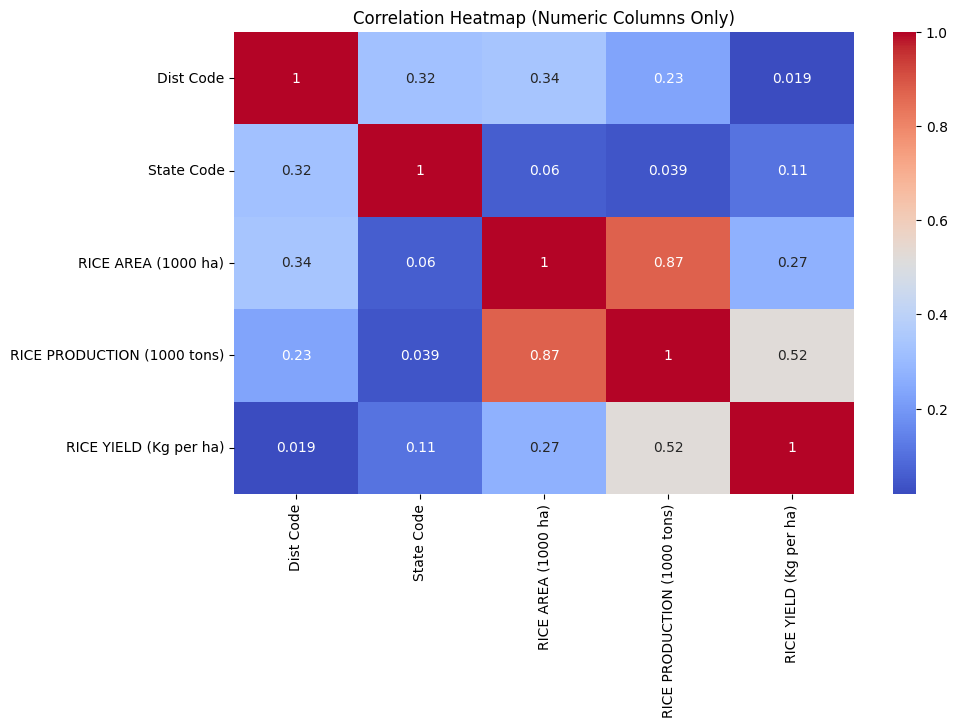

In [ ]:
# Data Analysis for production trends
# Select only numeric columns for the correlation heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


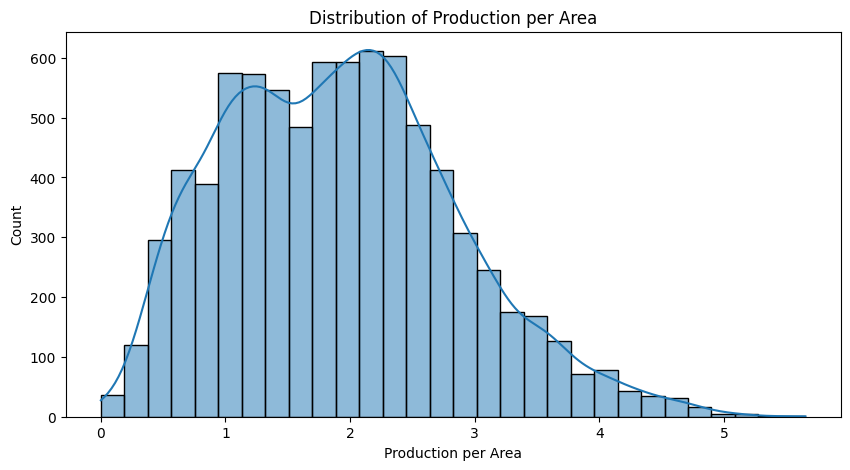

In [ ]:
# Feature Engineering
df['Production per Area'] = df['RICE PRODUCTION (1000 tons)'] / df['RICE AREA (1000 ha)']

plt.figure(figsize=(10, 5))
sns.histplot(df['Production per Area'], bins=30, kde=True)
plt.title('Distribution of Production per Area')
plt.show()


In [ ]:
# Perdictive Model Building / Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['RICE AREA (1000 ha)']]  # Feature
y = df['RICE PRODUCTION (1000 tons)']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 33858.71836448927
R² Score: 0.769372773186418


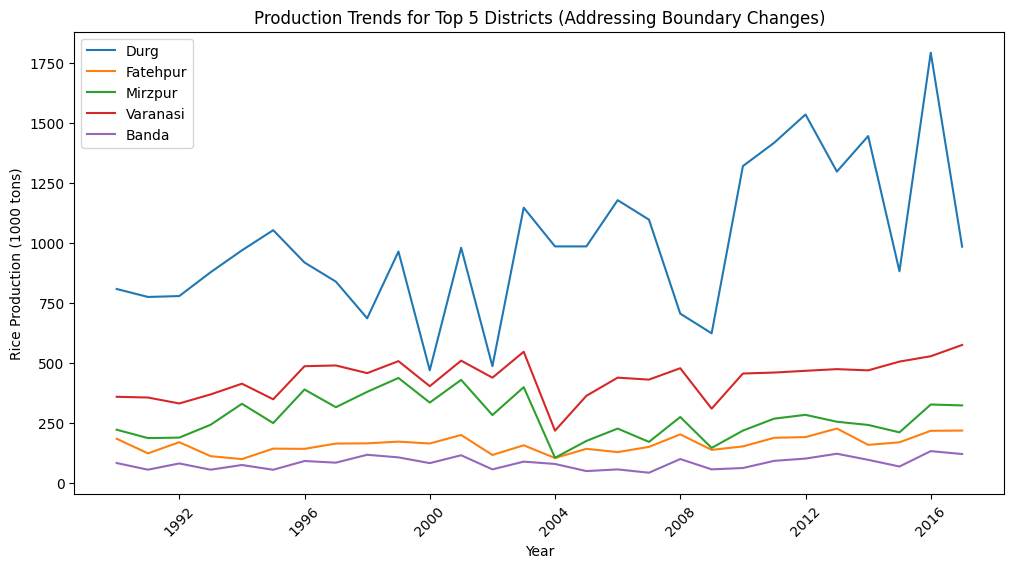

In [ ]:
# Visualization of Results..
# Total production over time for each district
top_districts = df['Dist Name'].value_counts().head(5).index  # Top 5 districts with the most records

plt.figure(figsize=(12, 6))
for district in top_districts:
    district_data = df[df['Dist Name'] == district]
    sns.lineplot(data=district_data, x='Year', y='RICE PRODUCTION (1000 tons)', label=district)

plt.title('Production Trends for Top 5 Districts (Addressing Boundary Changes)')
plt.xlabel('Year')
plt.ylabel('Rice Production (1000 tons)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-981742282da2>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainfall_production = df.groupby('Rainfall Bin')['RICE PRODUCTION (1000 tons)'].mean().reset_index()


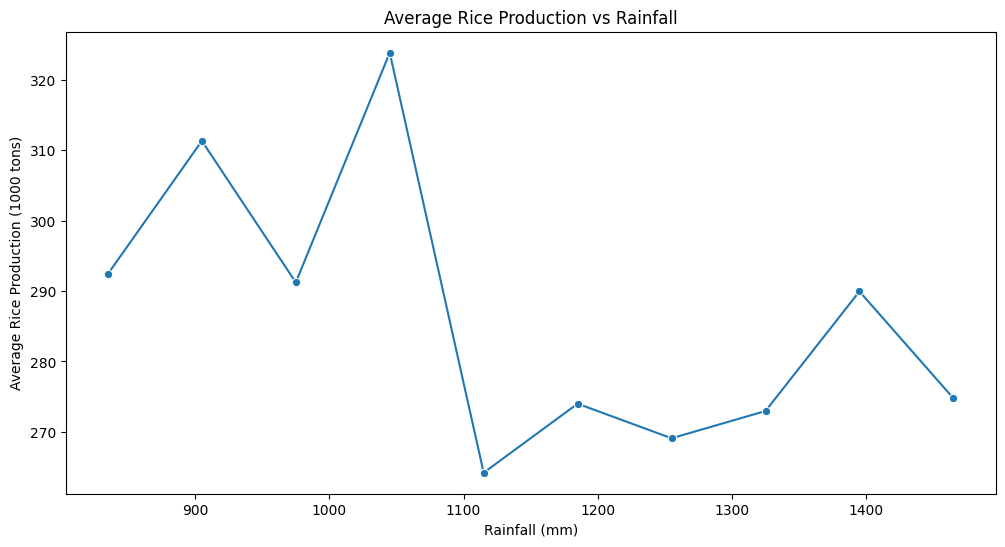

In [ ]:
# Climate & whether variability
# Simulated climate data for demonstration purposes
np.random.seed(42)
df['Rainfall (mm)'] = np.random.uniform(800, 1500, size=len(df))  # Simulating rainfall data

# Group by bins and calculate the midpoint for each bin
bin_edges = np.linspace(800, 1500, 11)  # Create 10 bins between 800 and 1500 mm
df['Rainfall Bin'] = pd.cut(df['Rainfall (mm)'], bins=bin_edges)
rainfall_production = df.groupby('Rainfall Bin')['RICE PRODUCTION (1000 tons)'].mean().reset_index()
rainfall_production['Bin Midpoint'] = rainfall_production['Rainfall Bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=rainfall_production, x='Bin Midpoint', y='RICE PRODUCTION (1000 tons)', marker="o")
plt.title('Average Rice Production vs Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Average Rice Production (1000 tons)')
plt.show()


<ipython-input-10-ef622b76c832>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=record_count.index, y=record_count.values, palette='viridis')


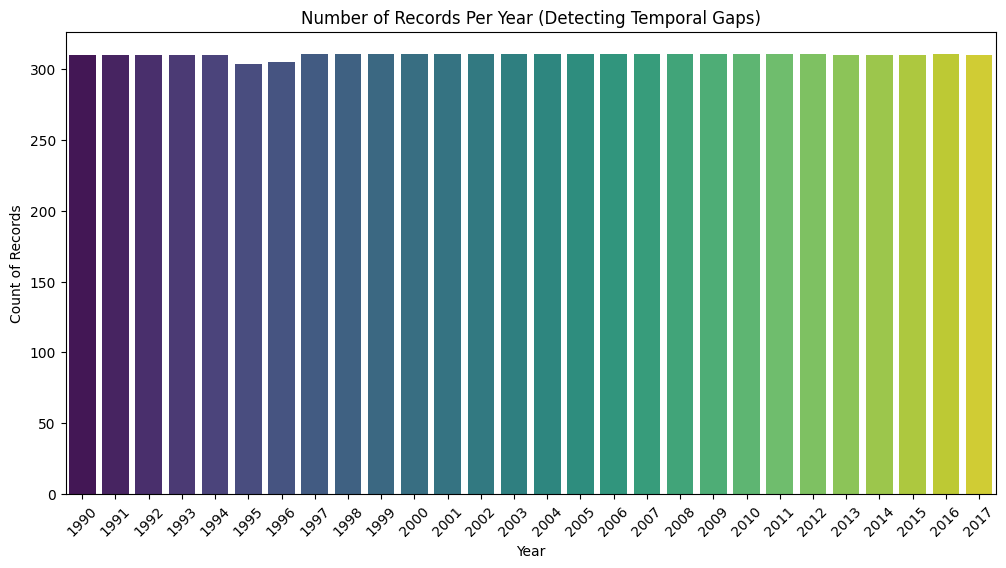

In [ ]:
# Temporal Gaps or inconsistent time ranges.

plt.figure(figsize=(12, 6))
record_count = df.groupby(df['Year'].dt.year)['Dist Name'].count()
sns.barplot(x=record_count.index, y=record_count.values, palette='viridis')

plt.title('Number of Records Per Year (Detecting Temporal Gaps)')
plt.xlabel('Year')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-dc0b280728d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='mako')


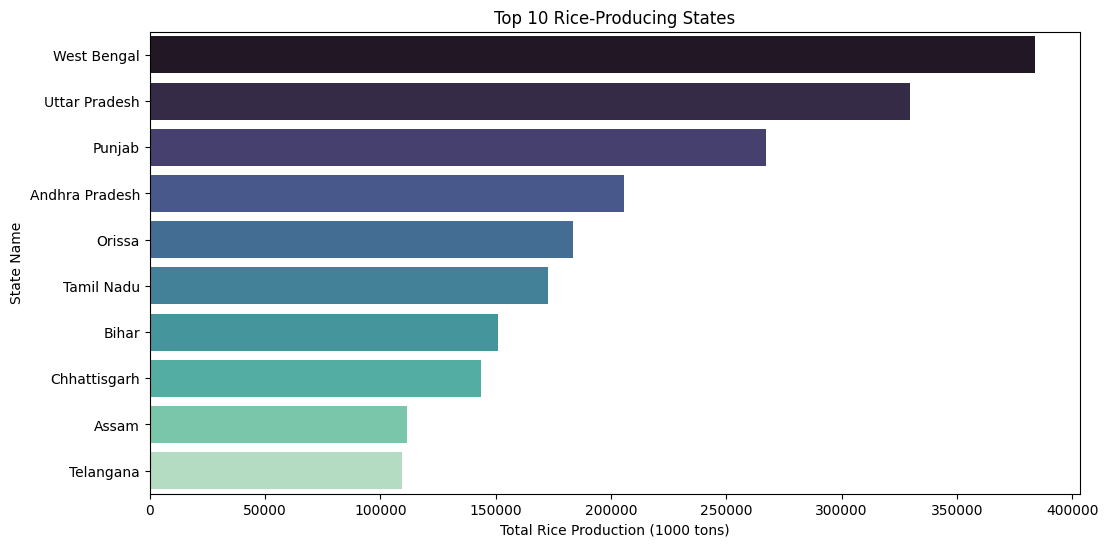

In [ ]:
top_states = df.groupby('State Name')['RICE PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='mako')
plt.title('Top 10 Rice-Producing States')
plt.xlabel('Total Rice Production (1000 tons)')
plt.show()


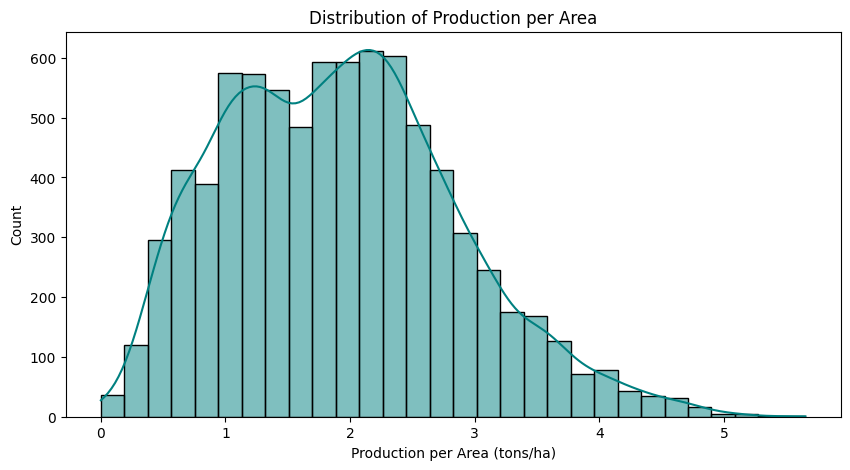

In [ ]:
# Production Per Area

plt.figure(figsize=(10, 5))
sns.histplot(df['Production per Area'], bins=30, kde=True, color='teal')
plt.title('Distribution of Production per Area')
plt.xlabel('Production per Area (tons/ha)')
plt.show()